In [4]:
using DataFrames, CSV, DelimitedFiles

CODE_ROOT = pwd() * "/../.."

include(CODE_ROOT * "/visualization.jl")

vertexHeatMapMesh (generic function with 1 method)

In [5]:
function latestfile(dir, filterfunc)
    return filter(filterfunc, readdir(dir, join=true))[end]
end

latestfile (generic function with 1 method)

In [7]:
using Statistics

In [7]:
nCellsX = 256
jprocs = 2048
fprocs = 2048

2048

In [8]:
fname = latestfile(CODE_ROOT * "/output/kelvinwave/resolution$(nCellsX)x$(nCellsX)/procs$(jprocs)/steps10/nvlevels100/", x->x[end-3:end] == ".txt")
# fname *= "2022-08-24T16:27:20.125.txt"
# fname *= "2022-08-24T16:40:29.640.txt"
# "/output/kelvinwave/resolution$(nCellsX)x$(nCellsX)/steps10/2022-06-01T20:17:04.919.txt"
df = DataFrame(CSV.File(fname))

runs = [:sim_time2, :sim_time3, :sim_time4, :sim_time5, :sim_time6]
mpis = [:mpi_time2, :mpi_time3, :mpi_time4, :mpi_time5, :mpi_time6]
juliasimmean = 1/length(runs) * sum(Array(df[:,runs]), dims=2)
juliampimean = 1/length(mpis) * sum(Array(df[:,mpis]), dims=2)
juliameans = juliasimmean .+ juliampimean


fortranfname = latestfile(CODE_ROOT * "/output/kelvinwave/fortranperformance/resolution$(nCellsX)x$(nCellsX)/", x -> occursin("$fprocs", x) && x[end-3:end] == ".txt")
fortrantiming = readdlm(fortranfname, skipstart=7)
fortranmeans = fortrantiming[:,end-2] #./ 4
fortranprocs = fortrantiming[:,1]

11-element Vector{Float64}:
 2048.0
 1024.0
  512.0
  256.0
  128.0
   64.0
   32.0
   16.0
    8.0
    4.0
    2.0

In [9]:
df

Row,procs,sim_time1,sim_time2,sim_time3,sim_time4,sim_time5,sim_time6,mpi_time1,mpi_time2,mpi_time3,mpi_time4,mpi_time5,mpi_time6,max_error,l2_error
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2.0,16.6296,16.3627,16.5565,16.5945,16.7148,16.368,4.23098,0.00152103,0.0226475,0.566628,0.139522,0.00151468,0.000201004,6.56709e-5
2,4.0,8.51687,8.56937,8.69863,8.53246,8.57163,8.57271,8.33306,0.0618006,0.158783,0.192971,0.0621171,0.138129,2.46605e-5,7.39473e-6
3,8.0,4.35153,4.40842,4.40663,4.4529,4.40431,4.40649,7.4615,0.0628088,0.0019315,0.092468,0.0742399,0.0666771,2.24824e-5,7.3e-6
4,16.0,2.10842,2.12163,2.21492,2.10352,2.12494,2.12521,8.13122,0.167211,0.499813,0.260882,0.163669,0.291719,5.13897e-5,2.11659e-5
5,32.0,1.07959,1.09442,1.09314,1.09395,1.09425,1.09315,7.80176,0.194564,0.215303,0.508201,1.23918,0.228698,1.25092e-5,4.99686e-6
6,64.0,0.640728,0.643284,0.64281,0.643375,0.643779,0.643542,8.1796,0.064088,0.0606397,0.381418,1.00163,0.0944269,1.04123e-5,5.30267e-6
7,128.0,0.334523,0.31266,0.312869,0.312895,0.312611,0.312637,9.83249,0.0367891,0.0348644,0.0581169,0.0520705,0.0361992,0.000185203,8.12725e-5
8,256.0,0.158882,0.151509,0.151374,0.151323,0.151813,0.154196,9.1365,1.7575,1.32302,0.653101,0.155203,0.152763,0.00011363,5.49478e-5
9,512.0,0.0753276,0.0743034,0.074861,0.0748864,0.074879,0.0743944,8.62217,0.976498,0.0353441,0.072831,0.045486,2.98728,1.54485e-5,9.59035e-6


In [10]:
fortrantiming

11×9 Matrix{Float64}:
 2048.0   0.03715   0.03739   0.03737  …   0.03728   44.0943    0.030302
 1024.0   0.04377   0.0434    0.04405      0.043818  37.5151    0.017534
  512.0   0.08374   0.08387   0.08322      0.08412   19.5416    0.027026
  256.0   0.17092   0.17111   0.17016      0.170508   9.64081   0.053956
  128.0   0.33927   0.33642   0.33787      0.338024   4.86307   0.107976
   64.0   0.65785   0.66726   0.66     …   0.660994   2.48691   0.146404
   32.0   1.26849   1.26618   1.26651      1.26672    1.29771   0.290402
   16.0   2.41911   2.41817   2.42052      2.4211     0.678962  0.154234
    8.0   3.3289    3.3001    3.28758      3.29627    0.498696  0.2
    4.0   5.83694   5.80164   5.79449      5.77507    0.284643  0.232442
    2.0  10.1322   10.2382   10.3514   …  10.209      0.161018  0.097262

In [11]:
function juliafortranmeans(nCellsX, jprocs=1024, fprocs=1024)
    fname = latestfile(CODE_ROOT * "/output/kelvinwave/resolution$(nCellsX)x$(nCellsX)/procs$(jprocs)/steps10/nvlevels100/", x->x[end-3:end] == ".txt")
    # fname *= "2022-08-24T16:27:20.125.txt"
    # fname *= "2022-08-24T16:40:29.640.txt"
    # "/output/kelvinwave/resolution$(nCellsX)x$(nCellsX)/steps10/2022-06-01T20:17:04.919.txt"
    df = DataFrame(CSV.File(fname))

    runs = [:sim_time2, :sim_time3, :sim_time4, :sim_time5, :sim_time6]
    mpis = [:mpi_time2, :mpi_time3, :mpi_time4, :mpi_time5, :mpi_time6]
    juliasimmean = 1/length(runs) * sum(Array(df[:,runs]), dims=2)
    juliampimean = 1/length(mpis) * sum(Array(df[:,mpis]), dims=2)
    juliameans = juliasimmean .+ juliampimean


    fortranfname = latestfile(CODE_ROOT * "/output/kelvinwave/fortranperformance/resolution$(nCellsX)x$(nCellsX)/", x -> occursin("$fprocs", x) && x[end-3:end] == ".txt")
    fortrantiming = readdlm(fortranfname, skipstart=7)
    fortranmeans = fortrantiming[:,end-2] #./ 4
    fortranprocs = fortrantiming[:,1]
    return juliameans, df.procs, fortranmeans, fortranprocs, fname, fortranfname
end

juliafortranmeans (generic function with 3 methods)

In [12]:
function strongscalingplot(juliameans, juliaprocs, fortranmeans, fortranprocs, nCellsX)

    perfectjulia = juliameans[1] * juliaprocs[1] ./ juliaprocs

    linewidth = 1
    linestyle = "-"
    markersize = 10
    tickfontsize = 15
    labelfontsize = 20

    fig, ax = plt.subplots(figsize=(9,9))
    ax.loglog(juliaprocs, juliameans, label="Julia", linewidth=linewidth,linestyle="-",color="red",marker="s",markersize=markersize)
    ax.loglog(fortranprocs, fortranmeans, label="Fortran", linewidth=linewidth,linestyle="--",color="blue",marker="D",markersize=markersize)
    ax.loglog(juliaprocs, perfectjulia, label="Perfect scaling", linestyle=":", color="black", linewidth=2)


    ax.set_xticks(juliaprocs)
    ax.tick_params(axis="x", labelsize=tickfontsize)
    ax.tick_params(axis="y", labelsize=tickfontsize)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    ax.set_xlabel("Number of processors", fontsize=labelfontsize)
    ax.set_ylabel("Wall clock time elapsed during computation (s)", fontsize=labelfontsize)
    ax.set_title("$(nCellsX)x$(nCellsX) Hexagonal Mesh", fontsize=21, fontweight="bold")
    ax.legend(loc="upper right", fontsize=labelfontsize)

    ax.grid(which="both")
    plt.tight_layout()

    return fig, ax
end

strongscalingplot (generic function with 1 method)

In [13]:
function strongscalingplot2(julia1, julia2, julia2std, juliaprocs, fortran1, fortran2, fortran2std, fortranprocs, nCellsX)

    perfectjulia = (julia2[1] + julia1[1]) * juliaprocs[1] ./ juliaprocs

    linewidth = 1
    linestyle = "-"
    markersize = 10
    tickfontsize = 15
    labelfontsize = 20

    fig, ax = plt.subplots(figsize=(9,9))
    ax.loglog(juliaprocs, julia1, label="Julia computation", linewidth=linewidth,linestyle="-",color="red",marker="s",markersize=markersize)
    ax.loglog(fortranprocs, fortran1, label="Fortran computation", linewidth=linewidth,linestyle="-",color="blue",marker="D",markersize=markersize)
    
    ax.errorbar(juliaprocs, julia2, yerr=julia2std, label="Julia communication", linewidth=linewidth,linestyle="--",color="red",marker="P",markersize=markersize)
    ax.errorbar(fortranprocs, fortran2, yerr=fortran2std, label="Fortran communication", linewidth=linewidth,linestyle="--",color="blue",marker="X",markersize=markersize)
    
    ax.loglog(juliaprocs, perfectjulia, label="Perfect scaling", linestyle=":", color="black", linewidth=2)


    ax.set_xticks(juliaprocs)
    ax.tick_params(axis="x", labelsize=tickfontsize)
    ax.tick_params(axis="y", labelsize=tickfontsize)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    ax.set_xlabel("Number of processors", fontsize=labelfontsize)
    ax.set_ylabel("Wall clock time elapsed during computation (s)", fontsize=labelfontsize)
    ax.set_title("$(nCellsX)x$(nCellsX) Hexagonal Mesh", fontsize=21, fontweight="bold")
    ax.legend(loc="upper right", fontsize=labelfontsize)

    ax.grid(which="both")
    plt.tight_layout()

    return fig, ax
end

strongscalingplot2 (generic function with 1 method)

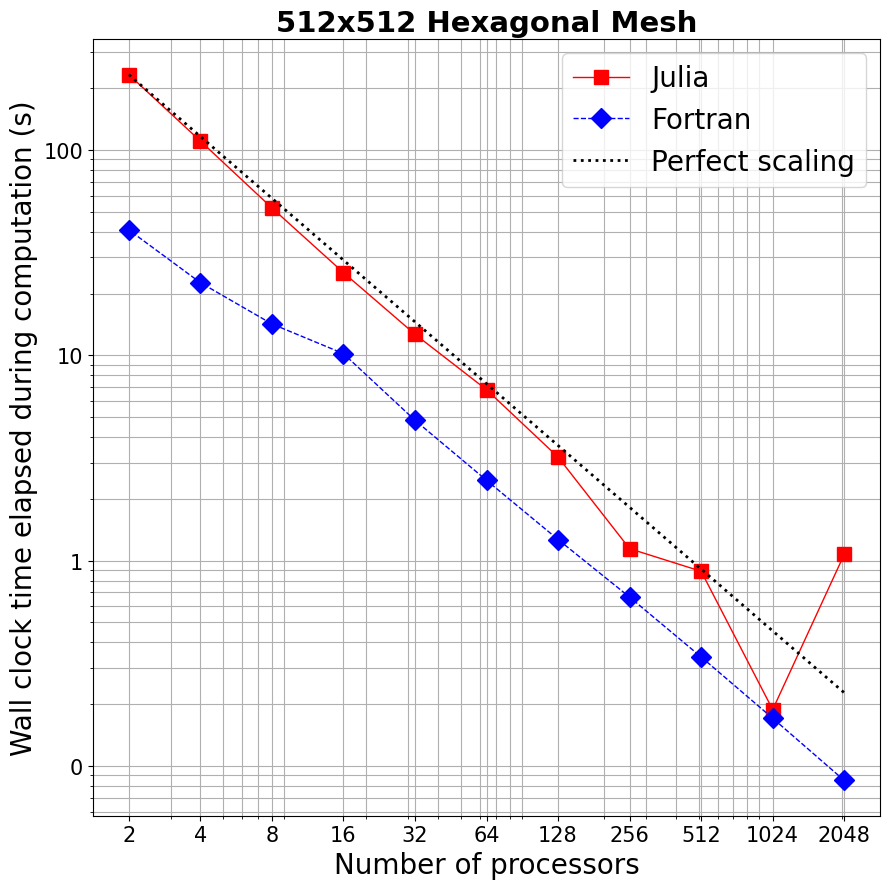

(Figure(PyObject <Figure size 900x900 with 1 Axes>), PyObject <AxesSubplot: title={'center': '512x512 Hexagonal Mesh'}, xlabel='Number of processors', ylabel='Wall clock time elapsed during computation (s)'>)

In [14]:
nCellsX = 512
jt, jp, ft, fp, juliafn, fortranfn = juliafortranmeans(nCellsX, 2048, 2048)
fig, ax = strongscalingplot(jt, jp, ft, fp, nCellsX)
# fig.savefig("$(juliafn)_scaling$(nCellsX)x.png")

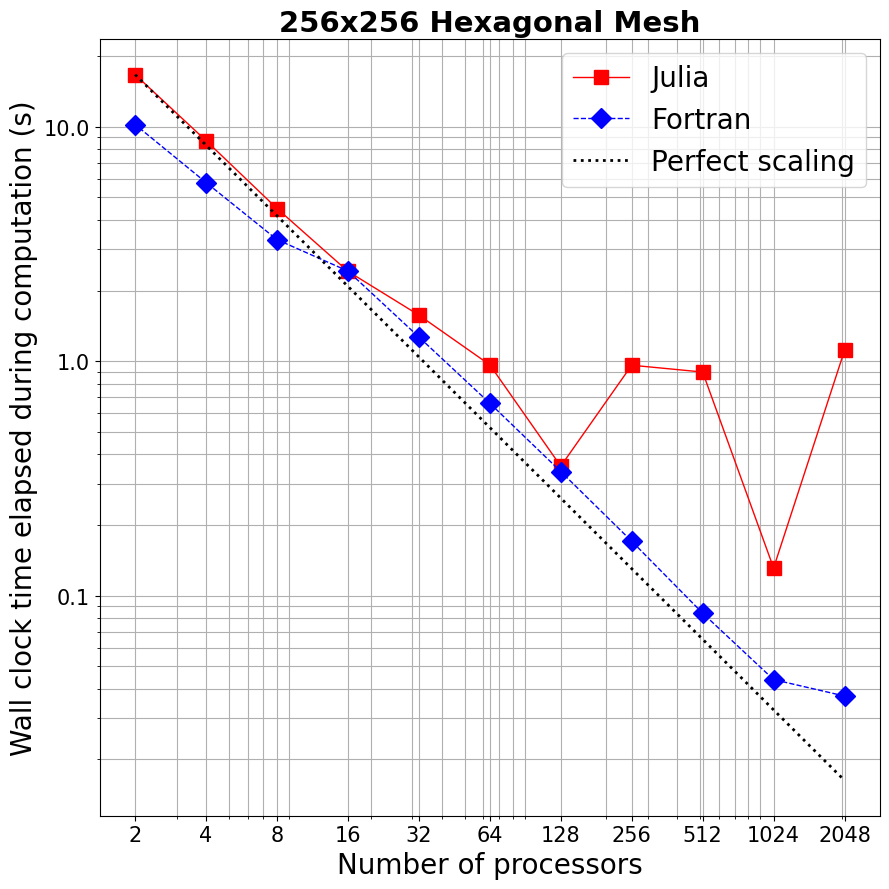

(Figure(PyObject <Figure size 900x900 with 1 Axes>), PyObject <AxesSubplot: title={'center': '256x256 Hexagonal Mesh'}, xlabel='Number of processors', ylabel='Wall clock time elapsed during computation (s)'>)

In [15]:
nCellsX = 256
jt, jp, ft, fp, juliafn, fortranfn = juliafortranmeans(nCellsX, 2048, 2048)
fig, ax = strongscalingplot(jt, jp, ft, fp, nCellsX)
# fig.savefig("$(juliafn)_scaling$(nCellsX)x.png")

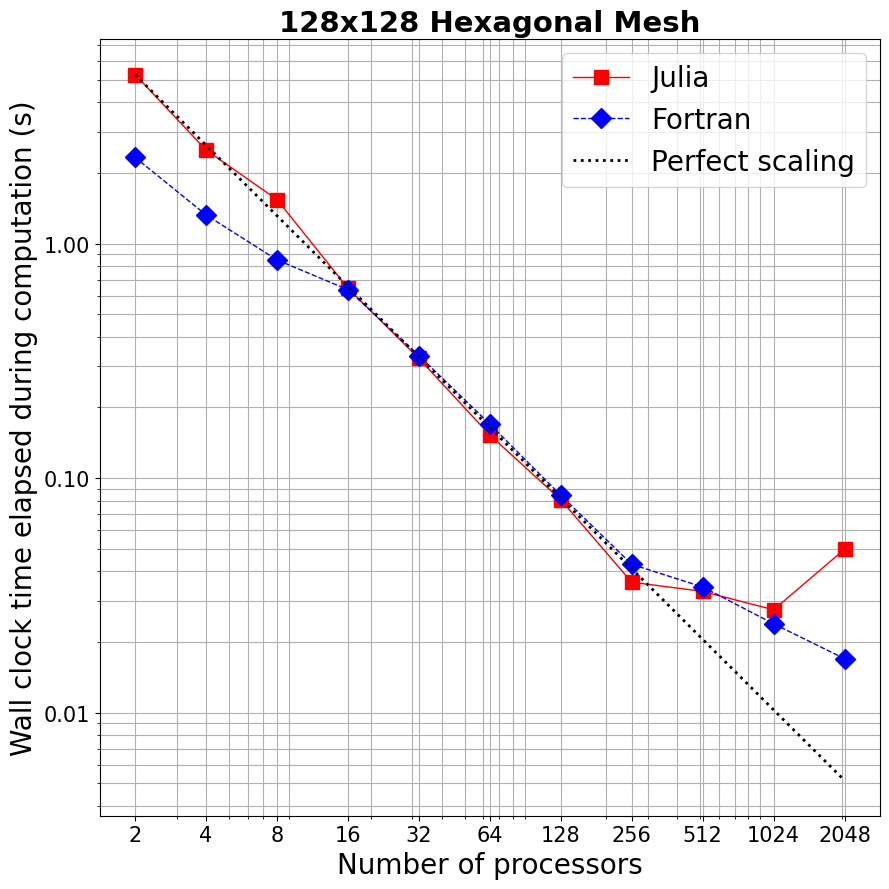

(Figure(PyObject <Figure size 900x900 with 1 Axes>), PyObject <AxesSubplot: title={'center': '128x128 Hexagonal Mesh'}, xlabel='Number of processors', ylabel='Wall clock time elapsed during computation (s)'>)

In [16]:
nCellsX = 128
jt, jp, ft, fp, juliafn, fortranfn = juliafortranmeans(nCellsX, 2048, 2048)
fig, ax = strongscalingplot(jt, jp, ft, fp, nCellsX)
# fig.savefig("$(juliafn)_scaling$(nCellsX)x.png")

In [17]:
# data = juliafortranmeans(256, 1024, 2048)
# fname = data[5]
# fig, ax = strongscalingplot(data[1:4]..., 256)
# fig.savefig("$(fname)_scaling256x.png")

In [3]:
function juliafortrantimesplits(nCellsX, jprocs=1024, fprocs=1024)
    fname = latestfile(CODE_ROOT * "/output/kelvinwave/resolution$(nCellsX)x$(nCellsX)/procs$(jprocs)/steps10/nvlevels100/", x->x[end-3:end] == ".txt")
    # fname *= "2022-08-24T16:27:20.125.txt"
    # fname *= "2022-08-24T16:40:29.640.txt"
    # "/output/kelvinwave/resolution$(nCellsX)x$(nCellsX)/steps10/2022-06-01T20:17:04.919.txt"
    df = DataFrame(CSV.File(fname))

    runs = [:sim_time2, :sim_time3, :sim_time4, :sim_time5, :sim_time6] # exclude first number because it may include on-the-fly compile time
    mpis = [:mpi_time2, :mpi_time3, :mpi_time4, :mpi_time5, :mpi_time6]
    juliasimmean = dropdims( 1/length(runs) * sum(Array(df[:,runs]), dims=2), dims=2)
    juliampimean = dropdims( 1/length(mpis) * sum(Array(df[:,mpis]), dims=2), dims=2)
#     juliameans = juliasimmean .+ juliampimean
    juliasimstd = std(Array(df[:,runs]), dims=2)
    juliampistd = std(Array(df[:,runs]), dims=2)


    fortranfname = latestfile(CODE_ROOT * "/output/kelvinwave/fortranperformance/resolution$(nCellsX)x$(nCellsX)/", x -> occursin("$fprocs", x) && x[end-3:end] == ".txt")
    fortrantiming = readdlm(fortranfname, skipstart=7)
    fortrantotalmeans = fortrantiming[:,end-2] #./ 4
    fortranhalos = fortrantiming[:,end]
    fortransimmean = fortrantotalmeans - fortranhalos
    # fortransypd = fortrantiming[:,end] .* 4
    fortranprocs = fortrantiming[:,1]
    # factor = ( fortransypd .* fortranmeans )[1]
    return juliasimmean, juliampimean, df.procs, fortransimmean, fortranhalos, fortranprocs, fname, fortranfname, juliasimstd, juliampistd
end

juliafortrantimesplits (generic function with 3 methods)

In [2]:
function timesplitplot(nprocs, comptime, mpitime, nCellsX, info="")
    fontscale = 2
    
    fig, ax = plt.subplots(1,1, figsize=(length(comptime)*3,8))
#     df = DataFrame(processors=nprocs, computation=comptime, communication=mpitime)
#     df.plot(kind="bar", 
#             stacked=true, 
#             colormap="tab10", 
#             figsize=(10, 6))
    totals = comptime + mpitime
    
    ax.bar(string.(Int.(nprocs)), comptime ./ totals, color="tab:blue", label="Computation")
    ax.bar(string.(Int.(nprocs)), mpitime ./ totals, bottom=comptime ./ totals, color="tab:red", label="Communication")
    
    ax.legend(loc="upper left", fontsize=20*fontscale, bbox_to_anchor=(1,1))
    
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_xlabel("Number of processors", fontsize=20*fontscale, labelpad=10.0*fontscale)
    ax.set_ylabel("Proportion of time", fontsize=20*fontscale, labelpad=10.0*fontscale)
    ax.tick_params(axis="x", labelsize=20*fontscale)
    ax.tick_params(axis="y", labelsize=20*fontscale)
    
    # " using $(nCellsX)x$(nCellsX) Hexagonal Mesh"
    ax.set_title("$info: Proportion of Simulation Time Spent on Computation vs Communication", fontweight="bold", fontsize=25*fontscale, y=1.135)
    
#     plt.tick_params(top="off", bottom="off", left="off", right="off", labelleft="off", labelbottom="on")
    
    plt.tight_layout()
    
    return fig, ax
end

timesplitplot (generic function with 2 methods)

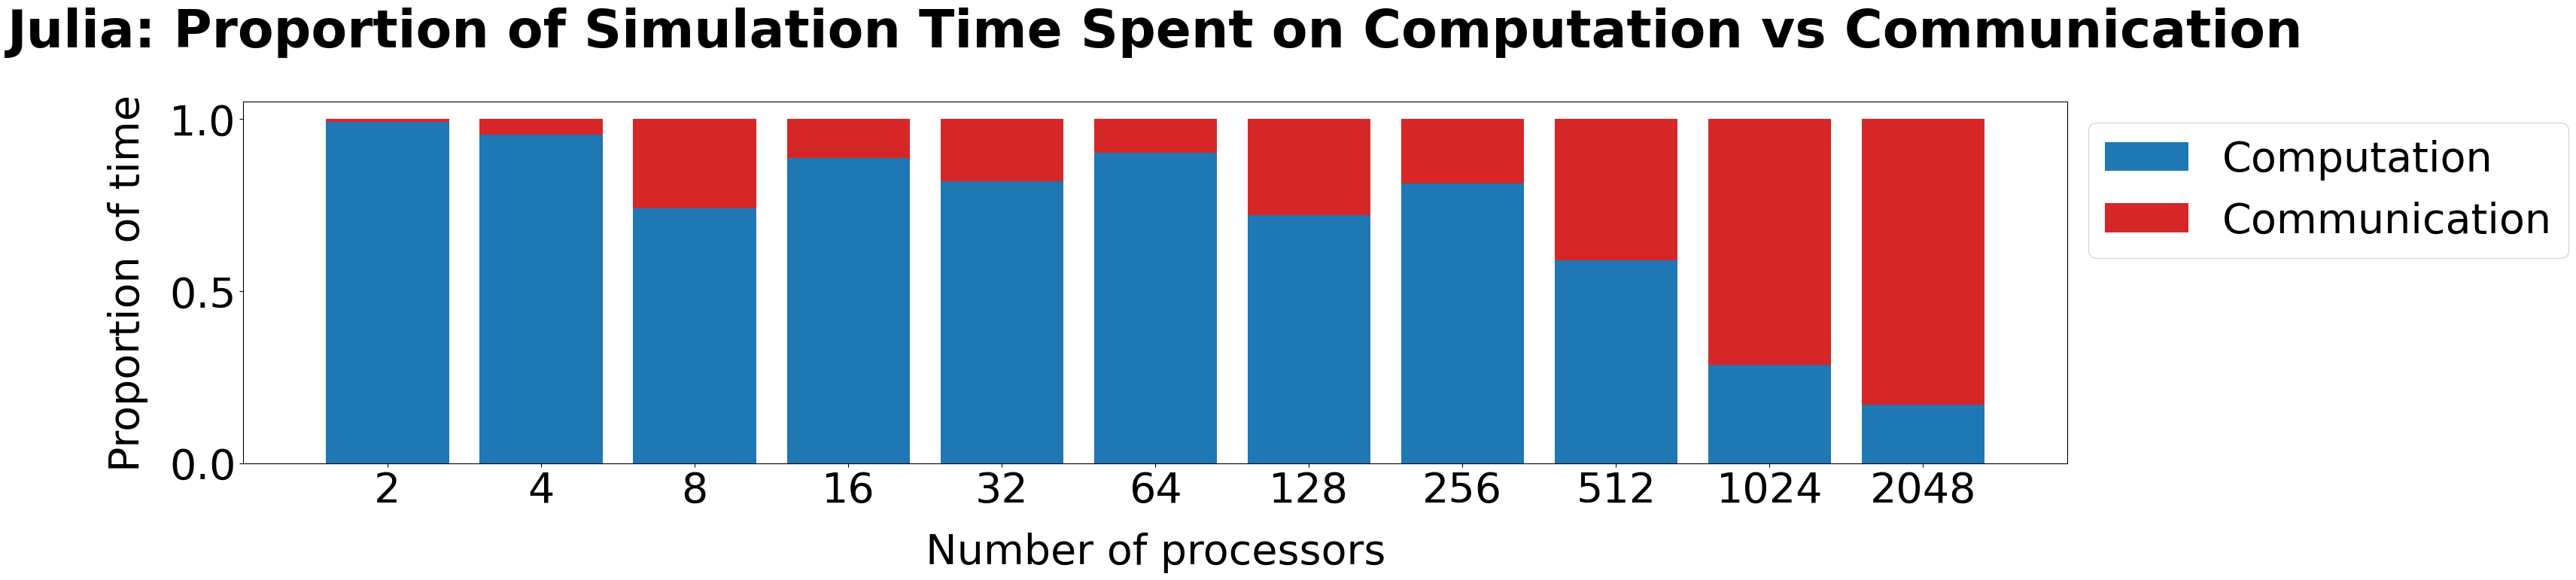

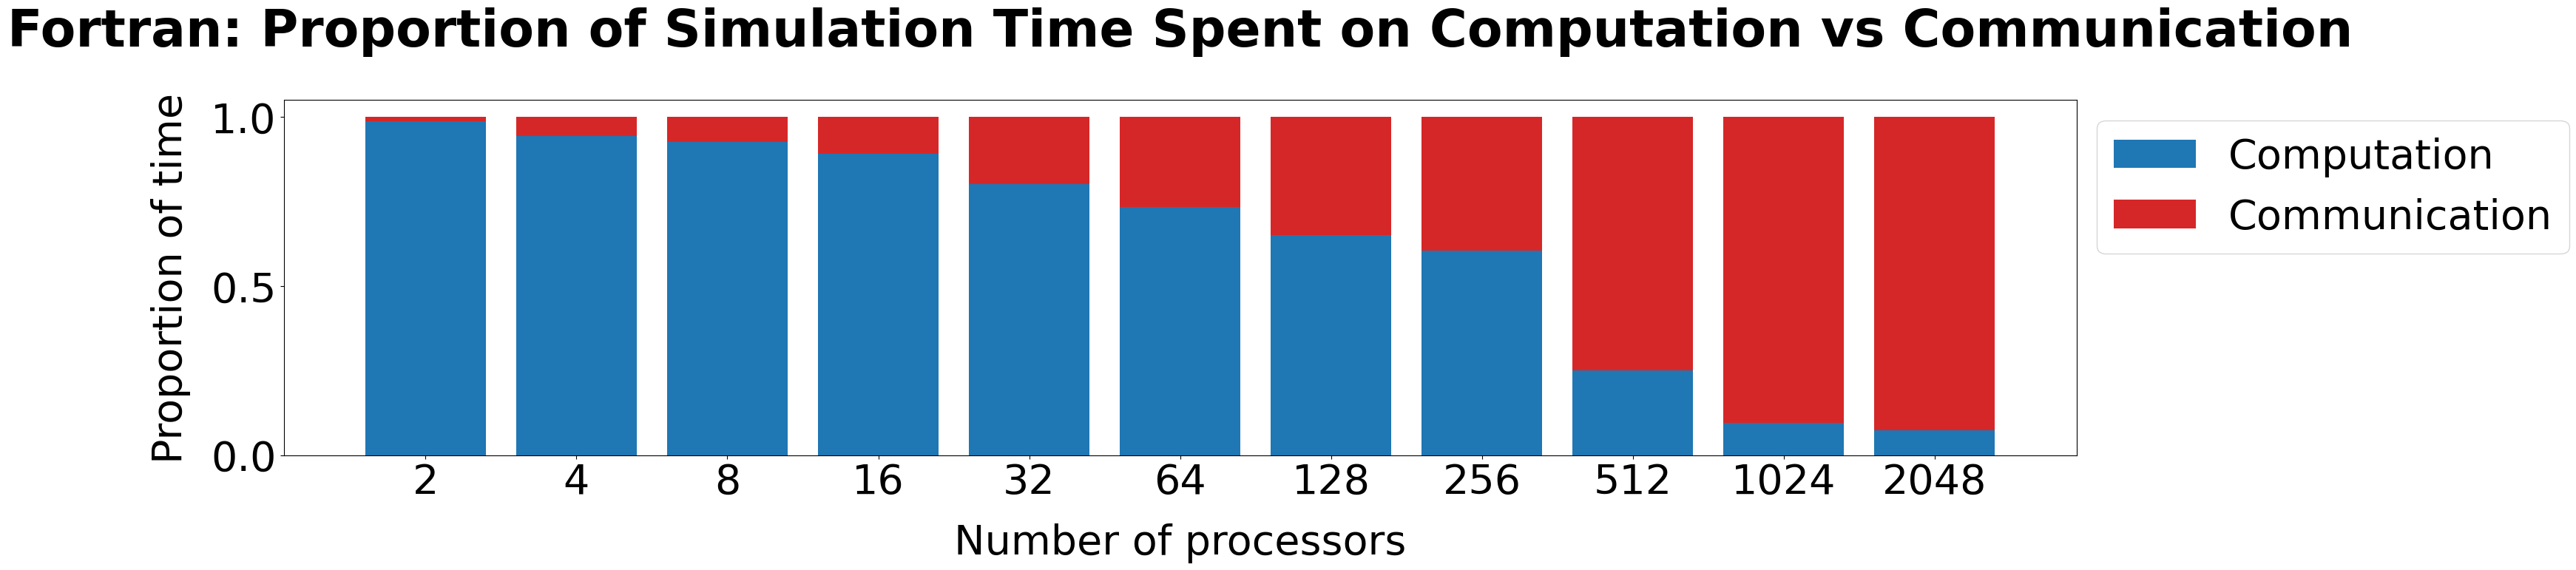

In [12]:
nCellsX = 128
juliasim, juliampi, juliaprocs, fortransim, fortranmpi, fortranprocs, juliafname, fortranfname, juliasimstd, juliampistd = juliafortrantimesplits(nCellsX, 2048, 2048)

fig, ax = timesplitplot(juliaprocs, juliasim, juliampi, nCellsX, "Julia")
fig.savefig("$(juliafname)_proportion_sim_mpi.pdf", bbox_inches="tight")
fig, ax = timesplitplot(fortranprocs[end:-1:1], fortransim[end:-1:1], fortranmpi[end:-1:1], nCellsX, "Fortran")
fig.savefig("$(fortranfname)_proportion_sim_mpi.pdf", bbox_inches="tight")

In [13]:
juliafname

"/global/u2/r/rstrauss/repos/MPAS_Ocean_Julia/output/kelvinwave/../../output/kelvinwave/resolution128x128/procs2048/steps10/nvlevels100/2022-09-06T22:17:58.045.txt"

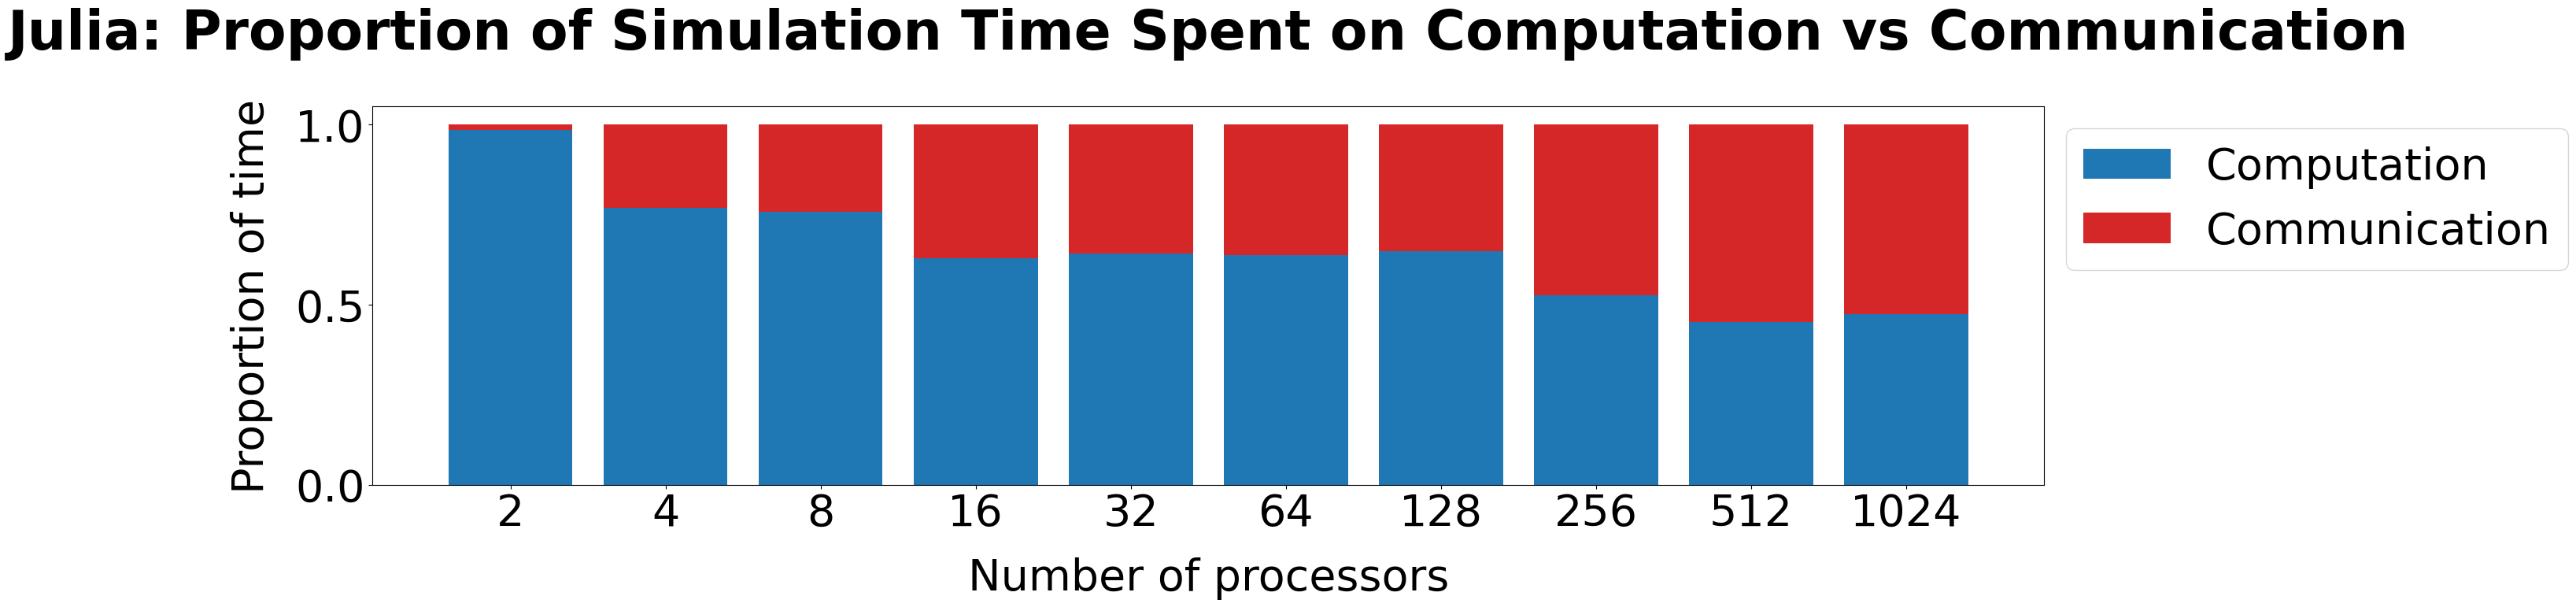

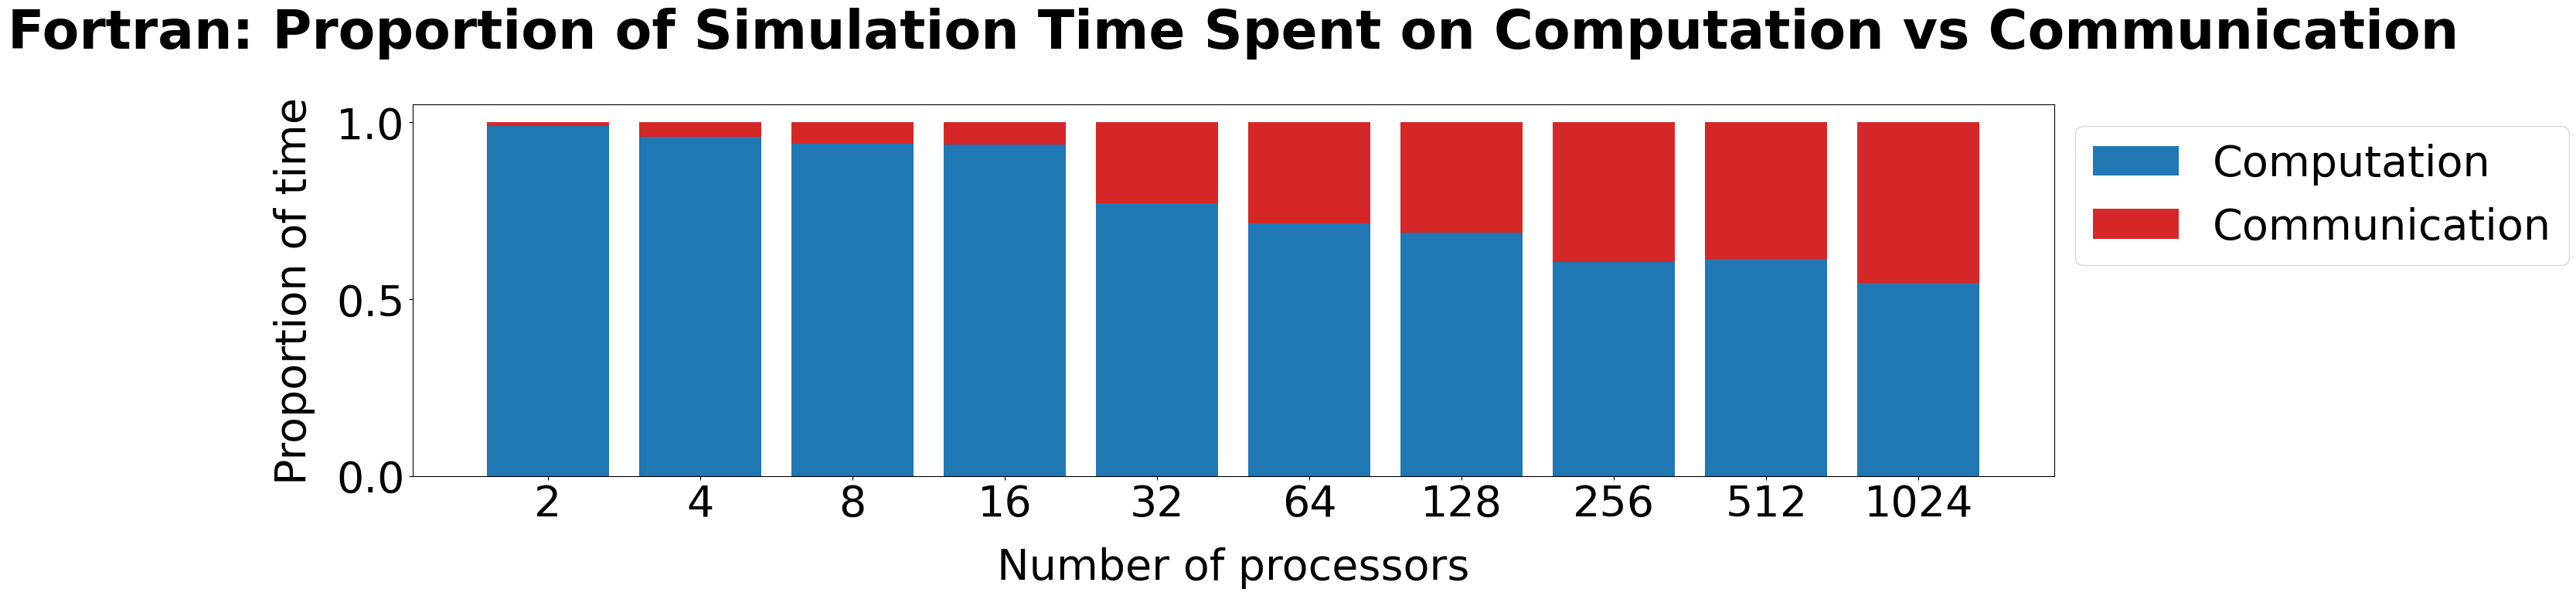

(Figure(PyObject <Figure size 3000x800 with 1 Axes>), PyObject <AxesSubplot: title={'center': 'Fortran: Proportion of Simulation Time Spent on Computation vs Communication'}, xlabel='Number of processors', ylabel='Proportion of time'>)

In [14]:
nCellsX = 256
juliasim, juliampi, juliaprocs, fortransim, fortranmpi, fortranprocs, juliafname, fortranfname = juliafortrantimesplits(nCellsX, 1024, 4096)
fig, ax = timesplitplot(juliaprocs, juliasim, juliampi, nCellsX, "Julia")
# fig.savefig("$(juliafname)_proportion_sim_mpi.pdf")
fig, ax = timesplitplot(fortranprocs[end:-1:3], fortransim[end:-1:3], fortranmpi[end:-1:3], nCellsX, "Fortran")
# fig.savefig("$(fortranfname)_proportion_sim_mpi.pdf")

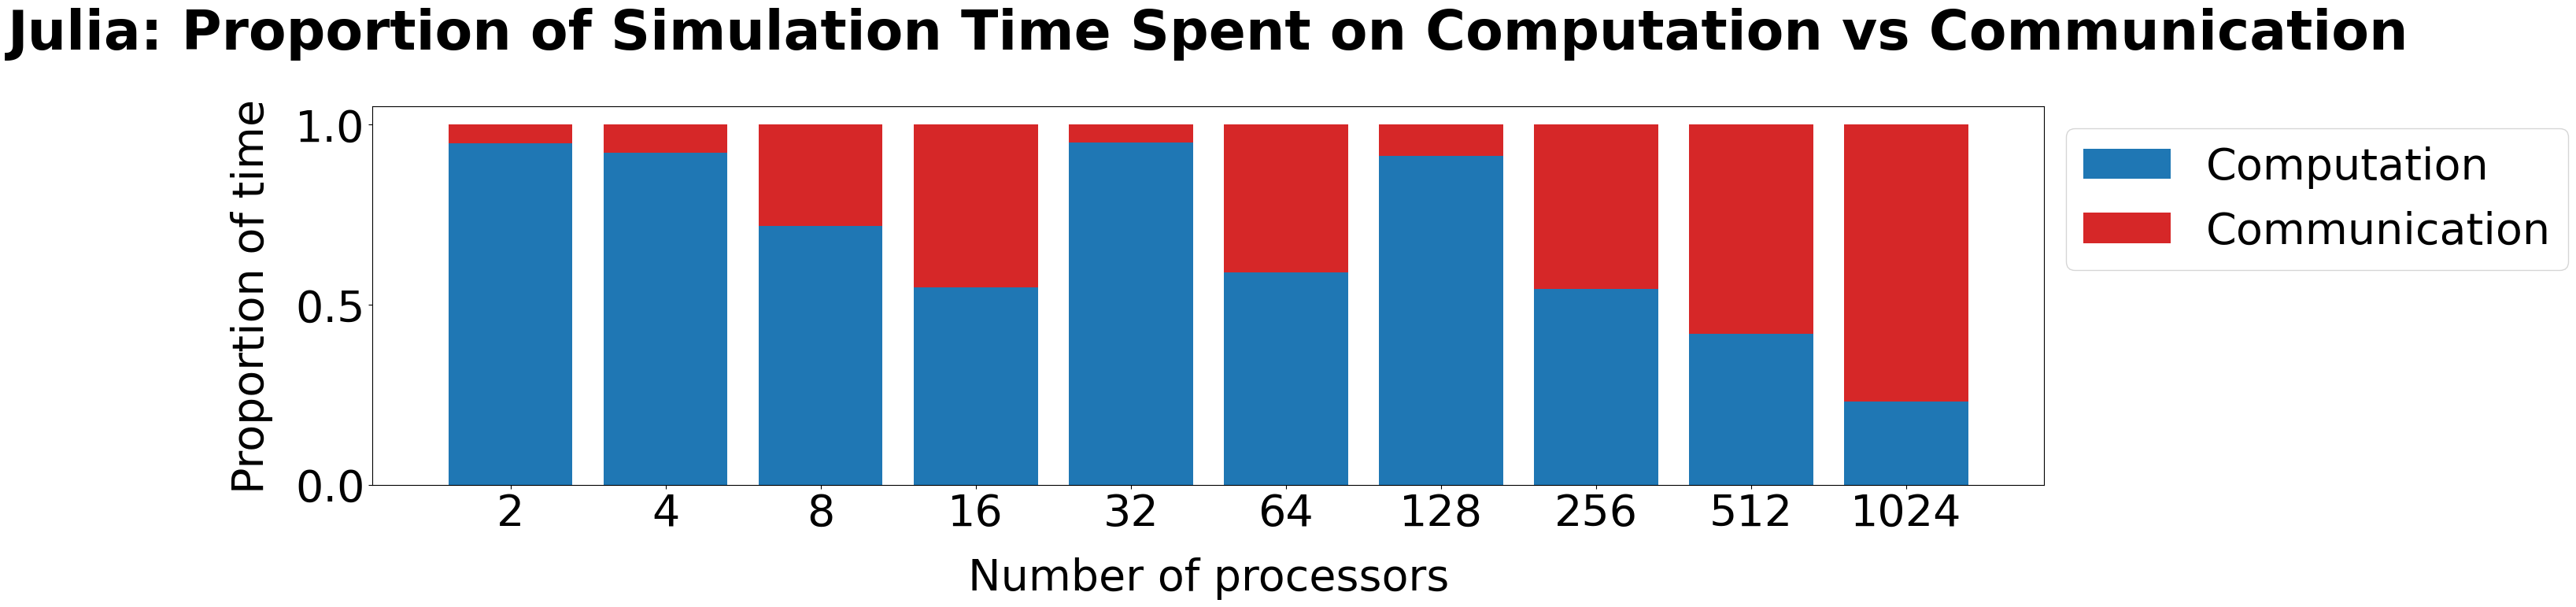

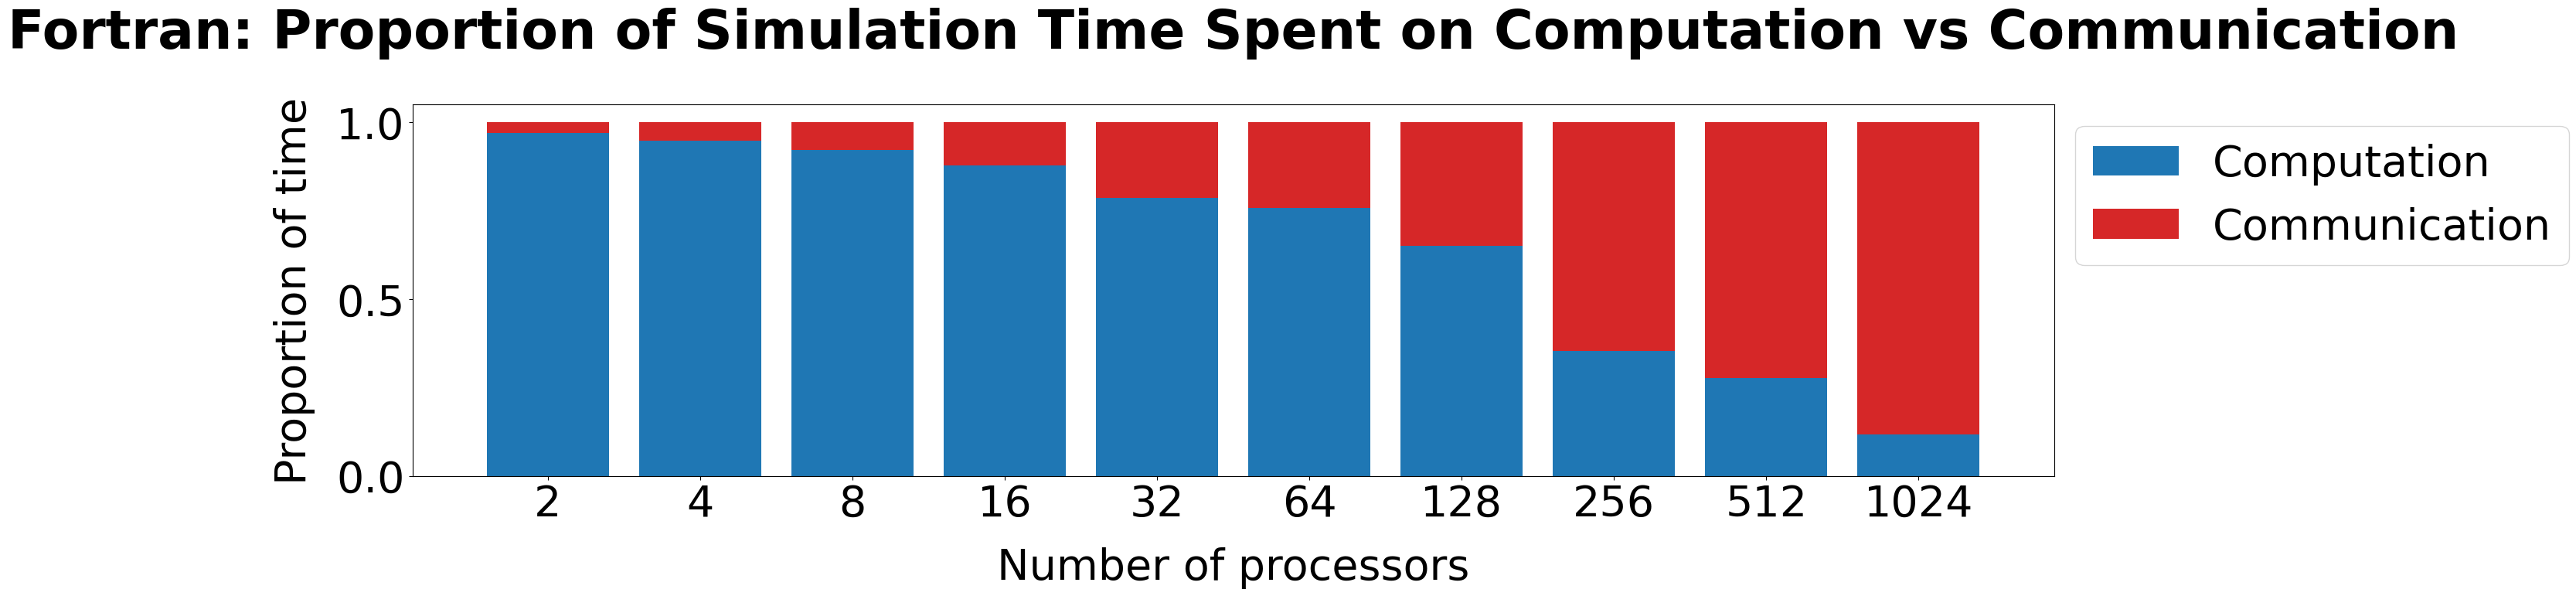

In [8]:
nCellsX = 128
juliasim, juliampi, juliaprocs, fortransim, fortranmpi, fortranprocs, juliafname, fortranfname = juliafortrantimesplits(nCellsX, 1024, 4096)
fig, ax = timesplitplot(juliaprocs, juliasim, juliampi, nCellsX, "Julia")
# fig.savefig("$(juliafname)_proportion_sim_mpi.pdf")
fig, ax = timesplitplot(fortranprocs[end:-1:3], fortransim[end:-1:3], fortranmpi[end:-1:3], nCellsX, "Fortran")
# fig.savefig("$(fortranfname)_proportion_sim_mpi.pdf")

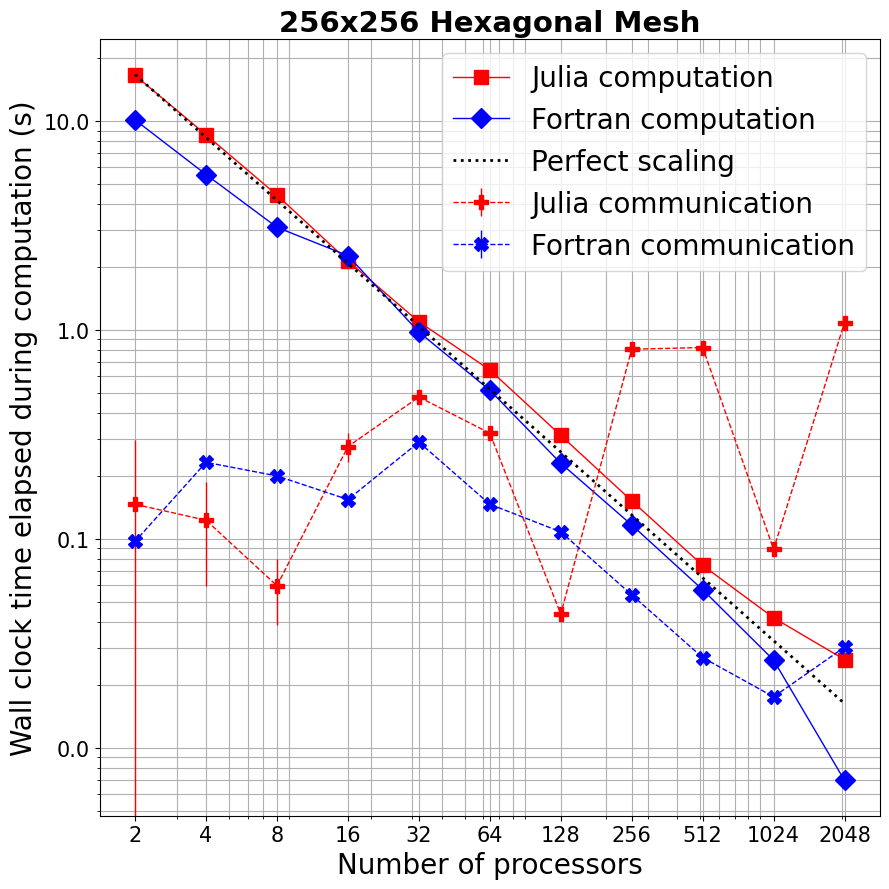

In [15]:
for nCellsX in [256]#[128, 256, 512]
    juliasim, juliampi, juliaprocs, fortransim, fortranmpi, fortranprocs, juliafname, fortranfname, juliasimstd, juliampistd = juliafortrantimesplits(nCellsX, 2048, 2048)

    fig, ax = strongscalingplot2(juliasim, juliampi, dropdims(juliampistd,dims=2), juliaprocs, fortransim, fortranmpi, zeros(length(fortranprocs)), fortranprocs, nCellsX)
    # fig.text(0.5, 1, "Computation only")
#     fig.savefig("$(juliafname)_scaling_$(nCellsX)x_sim_and_mpi.png", bbox_inches="tight")
end

In [ ]:
function weakscalingplot()
    resolutions = [128, 256, 512]
    cellsperproclines = [64^2, 64^2 /2, 64^2/4]
    juliatimes = zeros((length(resolutions),length(cellsperproclines)))
    fortrantimes = zeros((length(resolutions),length(cellsperproclines)))
    fnames = Vector{String}(undef, 4)

    for (i, nCellsX) in enumerate(resolutions)
        juliameans, juliaprocs, fortranmeans, fortranprocs, fnames[i] = juliafortranmeans(nCellsX)

        ind = findall(cpp -> cpp in cellsperproclines, nCellsX^2 ./ juliaprocs)
        juliatimes[i,:] = juliameans[ind]

        ind = findall(cpp -> cpp in cellsperproclines, nCellsX^2 ./ fortranprocs)
        fortrantimes[i,:] = fortranmeans[ind]
    end

    fig, ax = plt.subplots(1,1, figsize=(9,9))

    julialines = ax.loglog(resolutions, juliatimes)
    fortranlines = ax.loglog(resolutions, fortrantimes, linestyle="--")
    ax.set_xlabel("Number of cells (X)")
    ax.set_ylabel("Wallclock time elapsed during computation")
    ax.legend(julialines, cellsperproclines, title="cells per process (julia)", loc="upper left")
    ax.legend(fortranlines, cellsperproclines, title="cells per process (fortran)", loc="upper right")

    display(fig)

    return fig
end

weakscalingplot()





# fig.savefig("/tmp/plot.png")